## Pandas Data Frames

- What Is Pandas?
- Pandas vs Numpy 
- Pandas Data Frame Intro
- Pandas Data Frame fundamental operations
    - Creating
    - Selecting/indexing
    - Inserting rows/columns
    - Setting data
    - Filtering
    - dropping rwos/ columns
- Dealing with Missing values

%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


CSS = """
.output {
    align-items: center;
}
"""
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code mode"></form>''')

In [15]:
from IPython.display import display,Image, HTML

CSS = """
.output {
    align-items: center;
}
div.output_area {
    width: 80%;
}
"""
HTML('<style>{}</style>'.format(CSS))

# What is Pandas?

### - Enables working with tabular and labeled data easily and intuitively
### - Pandas is an open-source library built on top of Numpy Package.
- https://github.com/pandas-dev/pandas
- https://github.com/pandas-dev/pandas/blob/059c8bac51e47d6eaaa3e36d6a293a22312925e6/pandas/core/frame.py

### - Pandas data structures are:
    - Series
    - Index
    - Data Frame
    

## Quick refresh to Numpy Arrays..
- contains Numerical ***Homogonius*** Data
- may contain multi dimensional array elements.
- used for performing various numerical computations and processing of the multidimensional and single-dimensional array elements.

In [2]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

two_dim_arr = np.random.randint(10, size=(3, 4))  # Two-dimensional array
three_dim_arr = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array


### A two dimensional Array example...

In [3]:
print("Two Dimentional Array")
two_dim_arr

Two Dimentional Array


array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### What I mean by Homogeneous...

In [4]:
print(two_dim_arr)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


**two_dim_arr[0,0] = "Hello"**

In [6]:
#printmd("***Oops....***")
two_dim_arr[0,0] = "Hello"

ValueError: invalid literal for int() with base 10: 'Hello'

### You can directly and simply form the DataFrame from the 2D array

In [4]:
import pandas as pd

In [5]:
print("Data Frame formed by 2D Array")
#printmd("***df=pd.DataFrame(two_dim_arr)***")
df=pd.DataFrame(two_dim_arr)
df

Data Frame formed by 2D Array


,0,1,2,3
0,5,0,3,3
1,7,9,3,5
2,2,4,7,6


### Pandas Data Frame is Heterogeneous!
**df.iloc[0,0]="Hello"**

In [6]:
df.iloc[0,0]="Hello"
df

,0,1,2,3
0,Hello,0,3,3
1,7,9,3,5
2,2,4,7,6


### Pandas Data Frame labels the data with Indices and Columns labels
pd.DataFrame(np.random.randint(10,size=(3,2)),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

In [ ]:
np.random.randint(10,size=(3,2))

In [12]:
##np.random.seed(0)
foo_df=pd.DataFrame(np.random.randint(10,size=(3,2)),
             columns=['foo', 'bar']
                   )

In [10]:
foo_df.index

Index(['a', 'b', 'c'], dtype='object')

In [13]:
foo_df

,foo,bar
0,4,3
1,4,4
2,8,4


### Pandas DataFrame is relevant for statistical observations/data points with various variables (categorical, etc) 

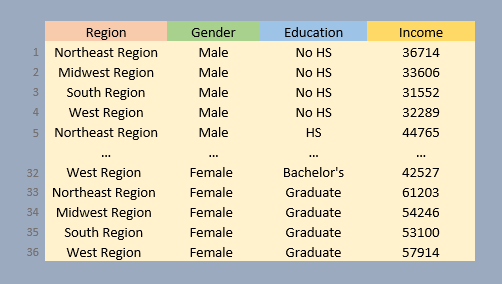

In [16]:
Image("res/Tidy_census.png")

### It is intuitive...  Look how convenient it is!!

In [70]:
people_df= pd.read_csv("data/people.csv")
people_df

,name,age,country
0,Pol,22,ES
1,Javi,20,ES
2,Maria,23,AR
3,Anna,24,FR
4,Anna,24,UK
5,Javi,30,MA
6,Dog,2,XX


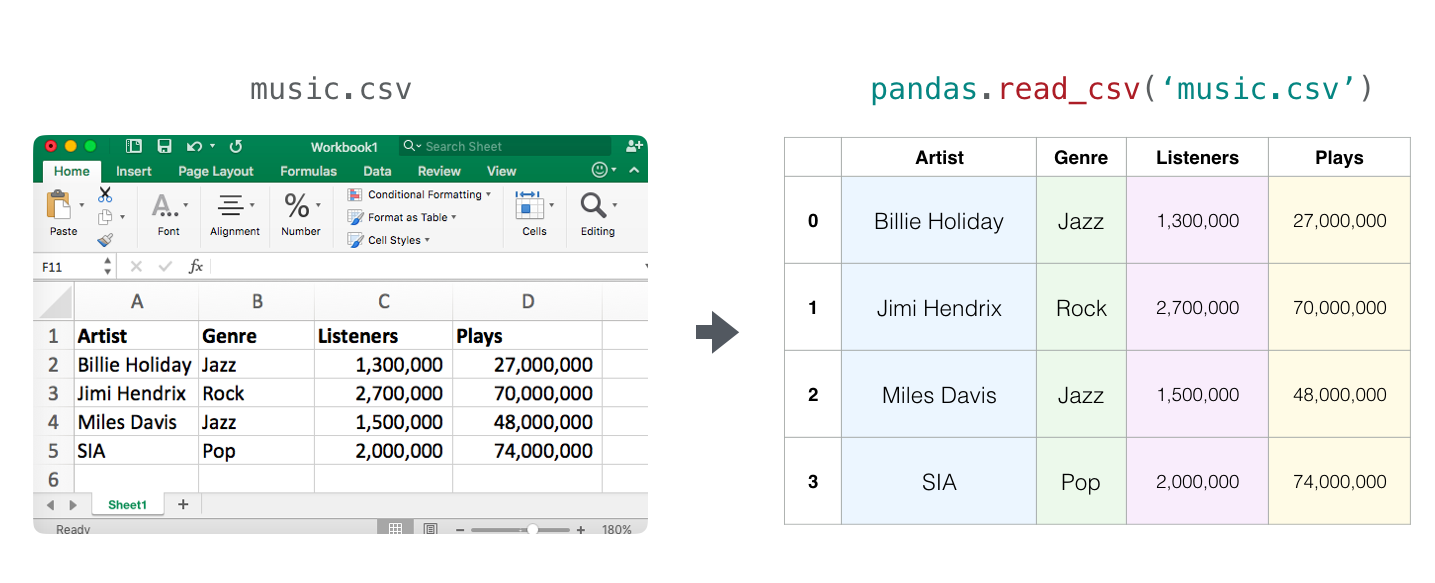

In [17]:
Image('res/excel-to-pandas.png')

In [51]:
people_df.to_csv("data/test_to_csv_function_people.csv",index=None,header=None)

In [55]:
data = pd.read_excel('data/test.xlsx',header=1)
data

,name,age,country
0,Kevin,22.0,FR
1,Carolina,19.0,FR
2,Marcia,18.0,FR


In [56]:
json_data=pd.read_json("data/vehicles.json")

In [63]:
json_data.head(100)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Acura,Legend,1987,2.7,6,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular,18.311667,16,22,18,493.722222,1850
96,Acura,Legend,1987,2.7,6,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,17.347895,17,23,19,467.736842,1750
97,Acura,Legend,1988,2.7,6,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular,18.311667,16,21,18,493.722222,1850
98,Acura,Legend,1988,2.7,6,Manual 5-spd,Front-Wheel Drive,Compact Cars,Regular,17.347895,17,22,19,467.736842,1750


In [59]:
list(json_data.columns)

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'City MPG',
 'Highway MPG',
 'Combined MPG',
 'CO2 Emission Grams/Mile',
 'Fuel Cost/Year']

source: https://jalammar.github.io/

### Describing the Data Frame...
- df.Info()
- df.count())
- df.describe())
- df.mean())

In [37]:
people_df

,name,age,country
0,Pol,22,ES
1,Javi,20,ES
2,Maria,23,AR
3,Anna,24,FR
4,Anna,24,UK
5,Javi,30,MA
6,Dog,2,XX


In [38]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     7 non-null      object
 1   age      7 non-null      int64 
 2   country  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [39]:
people_df.describe()

,age
count,7.000000
mean,20.714286
std,8.807464
min,2.000000
25%,21.000000
50%,23.000000
75%,24.000000
max,30.000000


In [47]:
people_df.std()

/var/folders/gh/s8b9pd096y13z1bxsq63d0x40000gn/T/ipykernel_78608/944423363.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  people_df.std()


age    8.807464
dtype: float64

In [ ]:
x=[1,3,4,50]
print(np.median(x))
print(np.mean(x))

In [ ]:
#print(df,"\n")
people_df.info()
#print("df.count()  \n",df.count())
#print("\n df.describe() \n",df.describe())
#print("\n df.mean() \n",df.mean())

### Pandas Data Frame operations

In [ ]:
Image("res/CRUD.png")

### Data Frame creation
You can create/form a Data Frame from:
- Dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Structured or record ndarray

- A Series

- Another DataFrame

#### Here is an example...

In [65]:
##print('dic = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}\n')

dic = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}

dic

{'col1': [1.0, 2.0, 3.0, 4.0], 'col2': [4.0, 3.0, 2.0, 1.0]}

In [67]:
df=pd.DataFrame(dic)
df

,col1,col2
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


#### creating Index for the Data frame...

In [ ]:
df=pd.DataFrame(dic,index=["a", "b", "c", "d"])
df

In [ ]:
np.array(df["col1"])

In [ ]:
pd.merge()

### Creating Data frame from Pandas Series objects.. 

In [68]:
d = {
       "apples": [3, 2, 0,1],
        "oranges": [0, 3, 7, 2],
    }

pd.DataFrame(d)

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


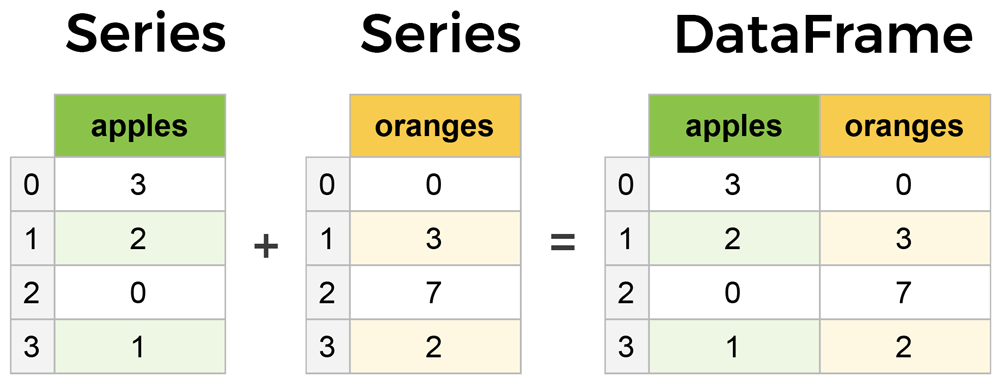

In [69]:
Image("res/series-and-dataframe.width-1200.png")

source: https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png

### Data Frame Selection / Indexing

In [ ]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

row_labels = [101, 102, 103, 104, 105, 106, 107]
students_df = pd.DataFrame(data=data, index=row_labels)
students_df

In [ ]:
students_df.index

Source: https://realpython.com/

### data Selection

In [ ]:
students_df.loc[[101],["age"]]

In [ ]:
students_df

### Selecting by Label
- .loc[]  function

In [ ]:
#print("students_df.loc[:, 'city']")
#students_df.loc[:, 'city']

In [ ]:
print("students_df.loc[102:106, ['name', 'city']]")
students_df.loc[102,:]

In [ ]:
#print('df["city"]')
cities = students_df[["age","city"]]
cities

In [ ]:
print("df.city")
students_df.city

### Selecting by Position
- .iloc[]

In [ ]:
students_df

In [ ]:
students_df.iloc[0,1]

In [ ]:
print("students_df.iloc[1:6, [0, 1]]")
students_df.iloc[1:6, [0, 1]]

### Hmm.. Can you tell what is the difference between loc and iloc?

### Setting/ Updating data

#### let us first update the Data frame index..

In [ ]:
students_df

In [ ]:
students_df.index = list(np.arange(0, 7))
students_df

In [ ]:
students_df=students_df.reset_index()

In [ ]:
students_df.index

In [ ]:
students_df.iloc[:4, 4] = [40, 50, 60, 70]
students_df

In [ ]:
students_df.loc[5, 'py-score'] 

In [ ]:
students_df.loc[5, 'py-score'] = 70
students_df

In [ ]:
students_df.loc[:,"py-score"]=90 
students_df

In [ ]:
students_df.iloc[:, -1] = [88.0, 90, 81.0, 80.0, 68.0, 61.0, 84.0]
students_df

In [ ]:
students_df["py-score"]="Adam-score"
students_df

In [ ]:
students_df

In [ ]:
students_df.info()

In [ ]:
students_df["py-score"]=students_df["py-score"]  * 1.5

In [ ]:
students_df

In [ ]:
students_df["py-score"]=list(map(lambda x: x+10,students_df["py-score"]))

In [ ]:
students_df["py-score"] +=  10


In [ ]:
students_df

In [ ]:
students_df["py-score"]= students_df["py-score"] + students_df["age"]

In [ ]:
students_df

In [ ]:
students_df.columns = ['index', 'name', 'city', 'age', 'py-score']

In [ ]:
students_df

In [ ]:
students_df[["age","py-score"]]

In [ ]:
type(students_df[["age"]])

### Inserting/deleteing rows

In [ ]:
students_df.columns


In [ ]:
students_df  = students_df[['name', 'city', 'age', 'py-score']]
students_df

In [ ]:
Ronald = pd.Series(data=['Ronald', 'Berlin', 34, 79],
                 index=students_df.columns[0:4])
students_df= students_df.append(Ronald,ignore_index=True)
students_df

In [ ]:
students_df.iloc[7,:]

In [ ]:
Ronald = pd.Series(data=['Ronald', 'Berlin', 34, 79],
                 index=students_df.columns[0:4],name=21)

In [ ]:
students_df=students_df.append(Ronald)


In [ ]:
students_df

In [ ]:
students_df.drop(labels=[7],inplace=True)

In [ ]:
students_df

### Inserting/Deleting columns

In [ ]:
#print('df[js-score] = np.array([71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0])')
students_df['js-score'] =[71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0]
students_df

In [ ]:
students_df['py-score-updated'] = students_df['py-score'] * 10 

In [ ]:
students_df

### Inserting in a specific location

In [ ]:
#print('df.insert(loc=4, column=js-score,value=np.array([86.0, 81.0, 78.0, 88.0, 74.0, 70.0, 81.0]))')
students_df.insert(loc=4, column='django-score',
          value=np.array([70, 74, 78, 56, 66, 78, 81.0]))
students_df

### dropping specific column

In [ ]:

## axis= 0 dropping by row,  axis=1. ropping by column
students_df = students_df.drop(labels=['django-score'], axis=1)

In [ ]:
students_df

### Filtering/Boolean Indexing

In [ ]:
students_df["py-score"] >= 200

In [ ]:
students_df[students_df["py-score"]>=200]

In [ ]:
very_good_students_filter = students_df['py-score'] >= 200
very_good_students_filter

In [ ]:
students_df[very_good_students_filter]

### Creating powerful filters with Logical operators AND, OR, NOT, XOR

In [ ]:
#print('df[(df[py-score] >= 80) & (df[js-score] >= 80)]')
students_df[(students_df['py-score'] >= 200) | (students_df['js-score'] >= 80)]

## using value counts  function

In [ ]:
people_df=pd.read_csv("data/people.csv")
people_df

In [ ]:
people_df["country"].value_counts()